In [5]:
import numpy as np 
import FlowCytometryTools
from FlowCytometryTools import FCMeasurement
from FlowCytometryTools import FCPlate
from FlowCytometryTools import ThresholdGate, PolyGate
import matplotlib.pyplot as plt
import scipy as sp
import scipy.special
import seaborn as sns
import pandas as pd
import datetime as dt

FSCHgateupper = ThresholdGate(6550.0, ['FSC-H'], region='below')
FSCHgatelower = ThresholdGate(5100.0, ['FSC-H'], region='above')
SSCHgatelower = ThresholdGate(4800.0, ['SSC-H'], region='above') 
SSCHgateupper = ThresholdGate(5600.0, ['SSC-H'], region='below')
scatter_gates = FSCHgateupper & FSCHgatelower & SSCHgatelower & SSCHgateupper


bfp_threshold = [[{"A1":7535, "B1":7650, "C1":7540, "D1":7600, "E1":7650, "F1":7600, "A3":7650, "B3":7650, "C3":7650, "A5":7500, "B5":7600, "C5":7500, "D5":7650, "E5":7550, "F5":7650, "A7":7600, "B7":7650, "C7":7600, "A9":7500, "B9":7600, "C9":7500, "D9":7575, "E9":7575, "F9":7675, "A11":7575, "B11":7600, "C11":7600}, 
                  {"A1":7525, "B1":7700, "C1":7550, "D1":7700, "E1":7675, "F1":7900, "A3":7600, "B3":7700, "C3":7650}], 
                 [{"A1":7500, "B1":7575, "C1":7500, "D1":7650, "E1":7600, "F1":7650, "A3":7500, "B3":7650, "C3":7550, "D3":7650, "E3":7600, "F3":7725, "A5":7500, "B5":7650, "C5":7550, "D5":7650, "E5":7650, "F5":7675, "A7":7450, "B7":7600, "C7":7500, "D7":7600, "E7":7600, "F7":7700, "A9":7500, "B9":7650, "C9":7550, "D9":7600, "E9":7600, "F9":7650, "A11":7475, "B11":7600, "C11":7525, "D11":7600, "E11":7600, "F11":7650}, 
                  {"A1":7650, "B1":7700, "C1":7600, "D1":7650, "E1":7675, "F1":7675, "A3":7650, "B3":7675, "C3":7650, "D3":7600, "E3":7675, "F3":7675, "A5":7675, "B5":7700, "C5":7600, "D5":7650, "E5":7625, "F5":7600, "A7":7600, "B7":7615, "C7":7675, "D7":7675, "E7":7650, "F7":7600, "A9":7600, "B9":7725, "C9":7600, "D9":7600, "E9":7700, "F9":7700, "A11":7600, "B11":7700, "C11":7700, "D11":7750, "E11":7700, "F11":7800}, 
                  {"A1":7500, "B1":7675, "C1":7525, "D1":7700, "E1":7650, "F1":7650, "A3":7500, "B3":7650, "C3":7550, "D3":7700, "E3":7600, "F3":7700, "A5":7500, "B5":7625, "C5":7500, "D5":7700, "E5":7700, "F5":7800, "A7":7500, "B7":7600, "C7":7450, "D7":7600, "E7":7600, "F7":7700, "A9":7500, "B9":7650, "C9":7500, "D9":7700, "E9":7650, "F9":7800, "A11":7500, "B11":7700, "C11":7500, "D11":7650, "E11":7650, "F11":7750}]]
yfp_threshold = 6100

days = list(range(2))
plates = {}
for day in days:
    list_plates = []
    datadir = '/Users/kristenlok/Desktop/5.22.22_monoculture_flucts/D{}/'.format(str(day))
    if day == 0:
        for p in list(range(1,3)):
            datadir = '/Users/kristenlok/Desktop/5.22.22_monoculture_flucts/D0/p{}/'.format(str(p))
            plate = FCPlate.from_dir(ID='96-well', path=datadir, parser='name')
            plate_transformed = plate.transform('hlog', channels=['BFP-H','YFP-H'], b=100.0).transform('hlog', channels=['FSC-H','SSC-H'], b=10.0**2).gate(scatter_gates)
            list_plates.append(plate_transformed)
    else:
        for p in list(range(1,4)):
            datadir = '/Users/kristenlok/Desktop/5.22.22_monoculture_flucts/D1/p{}/'.format(str(p))
            plate = FCPlate.from_dir(ID='96-well', path=datadir, parser='name')
            plate_transformed = plate.transform('hlog', channels=['BFP-H','YFP-H'], b=100.0).transform('hlog', channels=['FSC-H','SSC-H'], b=10.0**2).gate(scatter_gates)
            list_plates.append(plate_transformed)
    plates[day] = list_plates
    
    

/Users/kristenlok/opt/anaconda3/lib/python3.8/site-packages/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)
/Users/kristenlok/opt/anaconda3/lib/python3.8/site-packages/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)
/Users/kristenlok/opt/anaconda3/lib/python3.8/site-packages/FlowCytometryTools/core/transforms.py:180: RuntimeWarning: divide by zero encountered in log10
  lxmin = max([log10(abs(xmin)), 0])


In [6]:
def f1_expectation(theta,f1obs_data,f2obs_data,nmax=100):
    f1,lam = theta
    f2=1-f1
    f1obs=0
    f2obs=0
    for k in range(1,nmax):
        f1obs+=((f1*lam)**k)/scipy.special.factorial(k)/(np.exp(lam)-1)
        f2obs+=((f2*lam)**k)/scipy.special.factorial(k)/(np.exp(lam)-1)
    return f1obs-f1obs_data, f2obs-f2obs_data


def get_bfp_freq(data, day, plate_num, well):
    bfp_pos = data['BFP-H']>bfp_threshold[day][plate_num][well]
    yfp_pos = data['YFP-H']>yfp_threshold
    bfp_neg = data['BFP-H']<bfp_threshold[day][plate_num][well]
    yfp_neg = data['YFP-H']<yfp_threshold

    bfp = len(data[bfp_pos & yfp_neg])
    yfp = len(data[yfp_pos & bfp_neg])
    dp = len(data[bfp_pos & yfp_pos])
    Q = bfp + yfp + dp
    func = lambda theta: f1_expectation(theta,bfp/Q,yfp/Q)
    res = sp.optimize.root(func, [bfp/Q, 0.5])

    bfp_mean = np.float(data[bfp_pos & yfp_neg]['BFP-H'].mean())
    yfp_mean = np.float(data[yfp_pos & bfp_neg]['YFP-H'].mean())
    return res.x, Q, bfp_mean, yfp_mean

In [7]:
def plot_plates(plates, day, plate_num, well, bfp_threshold, yfp_threshold):
    b_gate = ThresholdGate(bfp_threshold[day][plate_num][well], ['BFP-H'], region='above')
    y_gate = ThresholdGate(yfp_threshold, ['YFP-H'], region='above')
    all_plates = list(plates.values())
    for plate in all_plates:
        all_plates[day][plate_num][well].plot(['BFP-H', 'YFP-H'], gates=[b_gate, y_gate]) 

/Users/kristenlok/opt/anaconda3/lib/python3.8/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


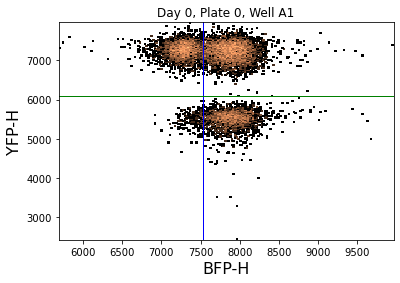

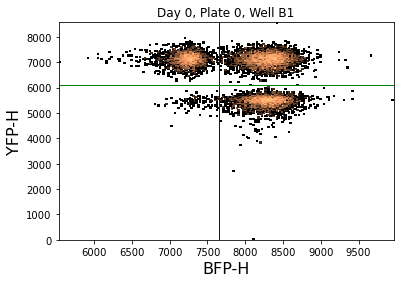

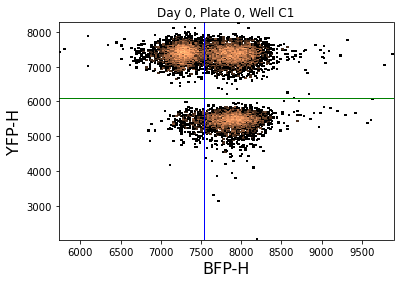

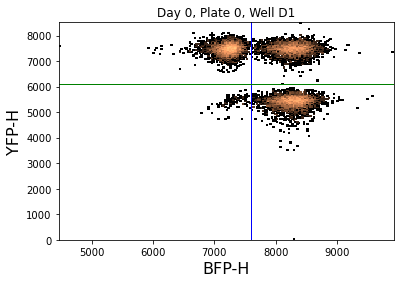

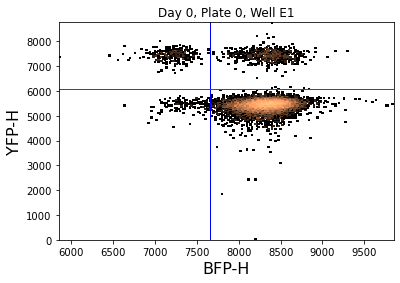

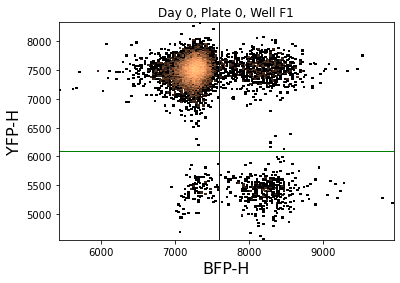

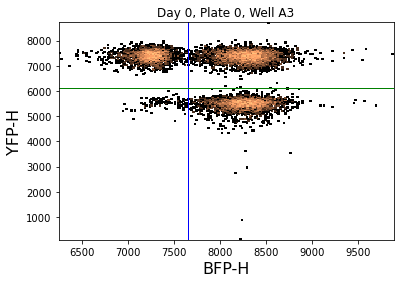

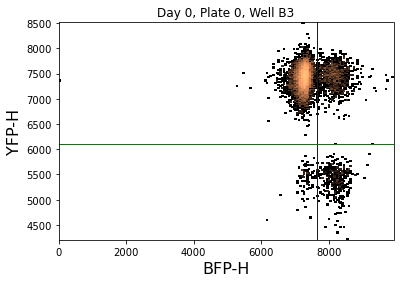

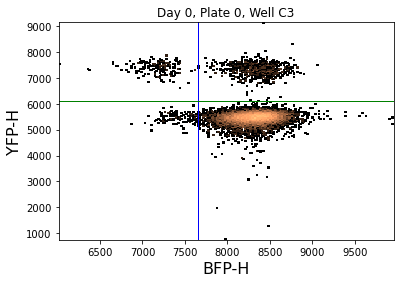

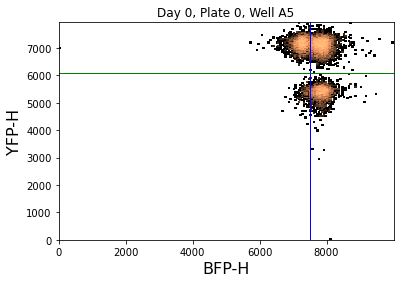

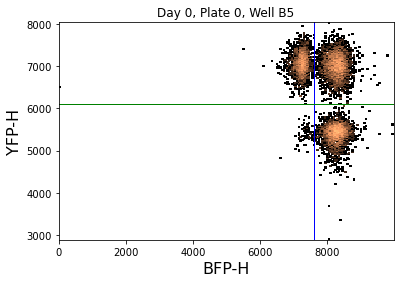

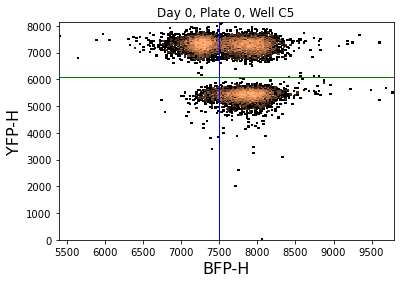

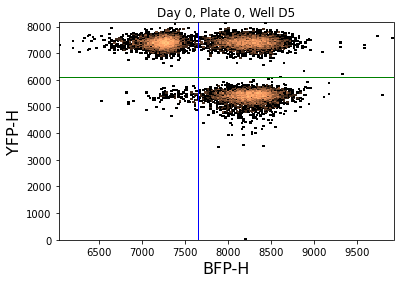

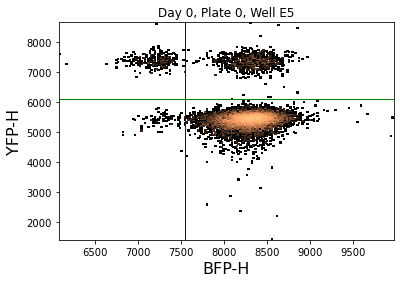

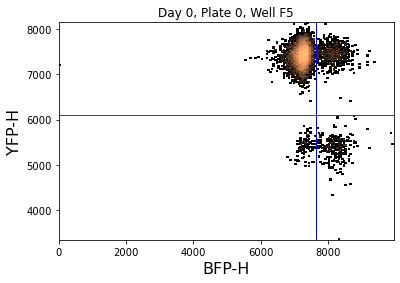

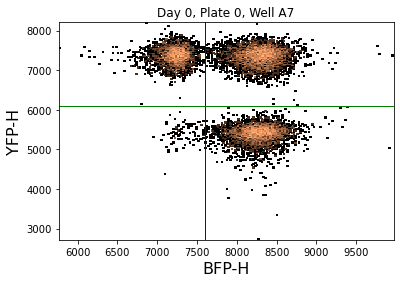

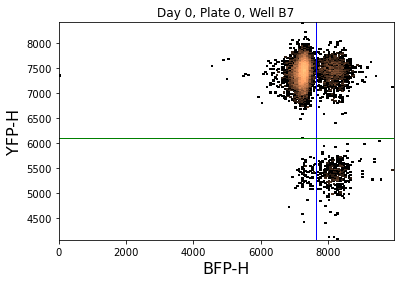

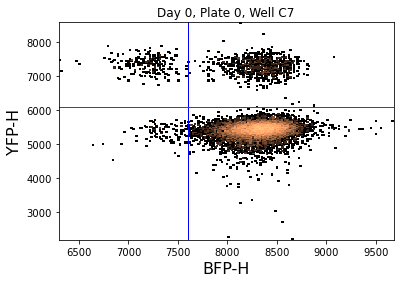

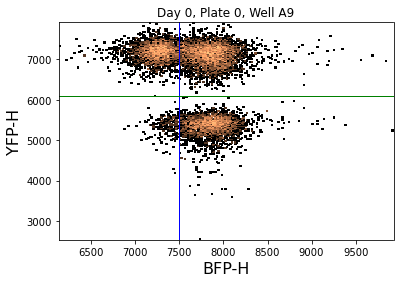

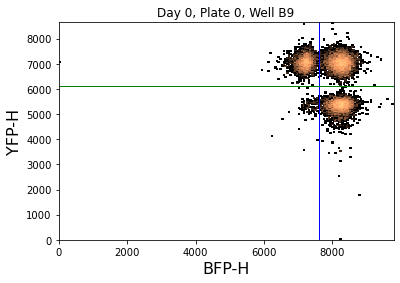

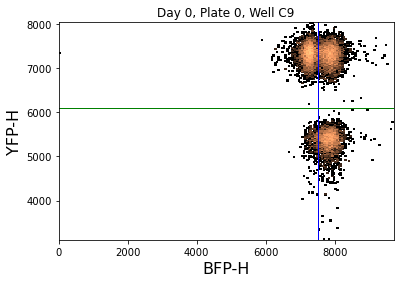

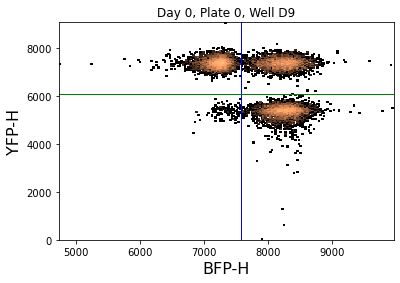

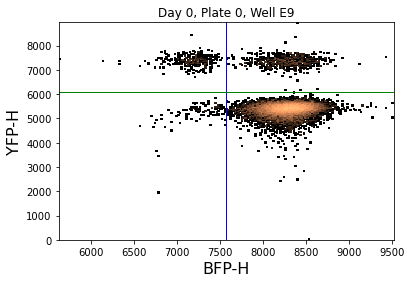

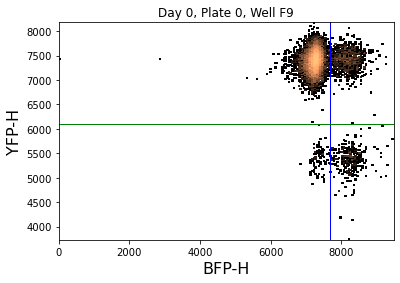

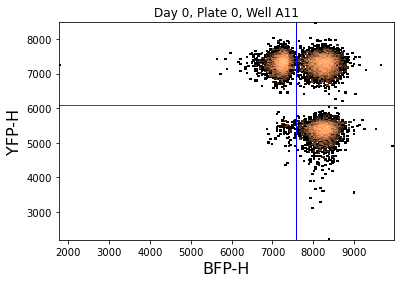

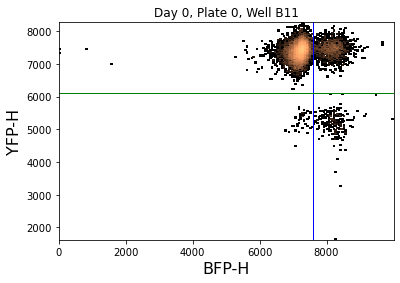

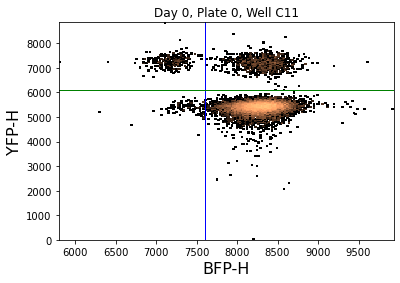

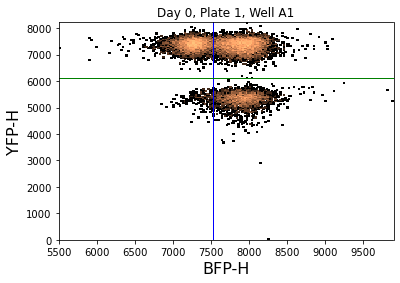

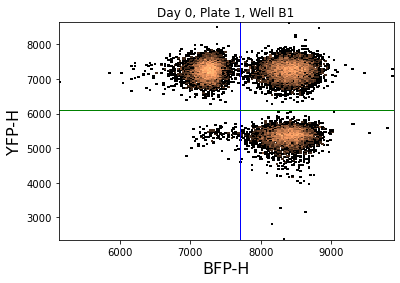

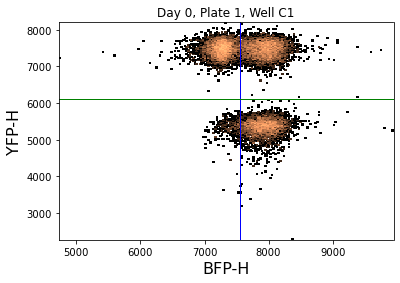

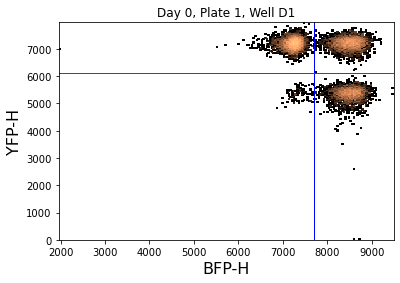

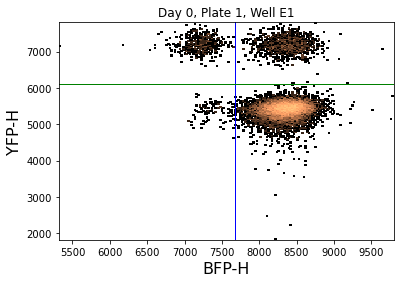

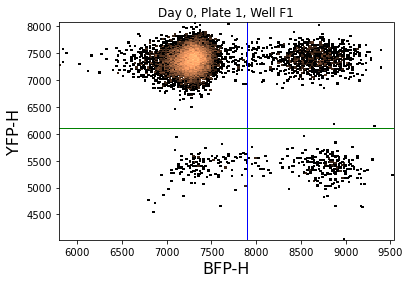

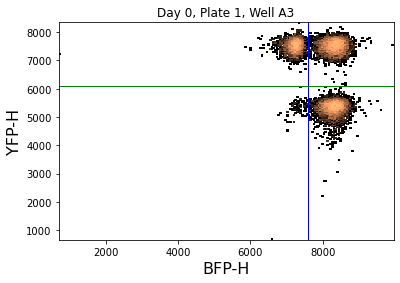

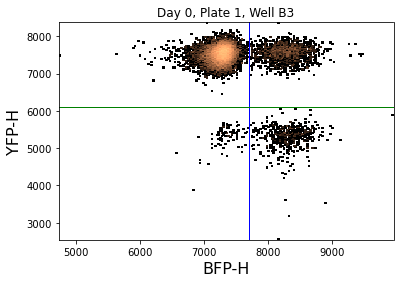

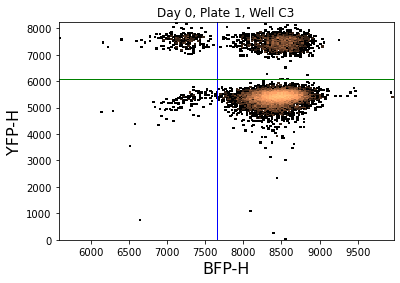

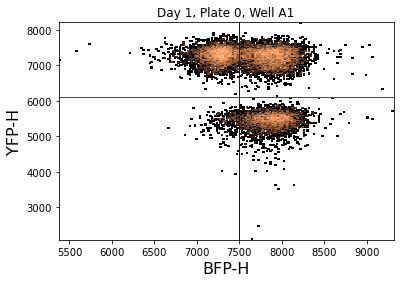

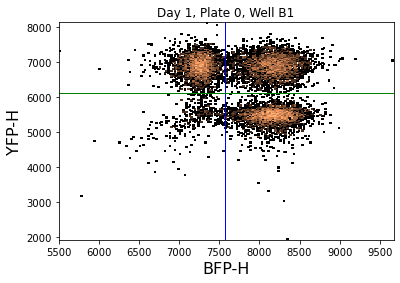

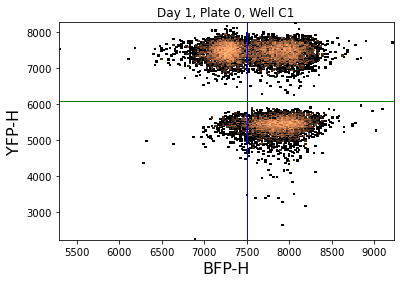

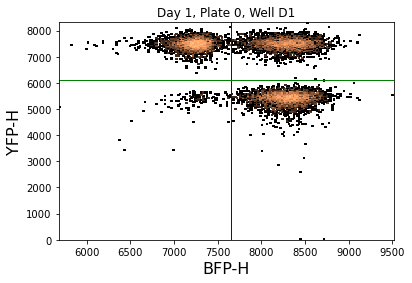

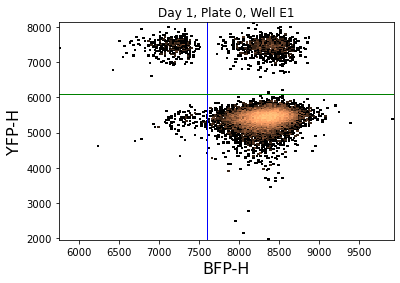

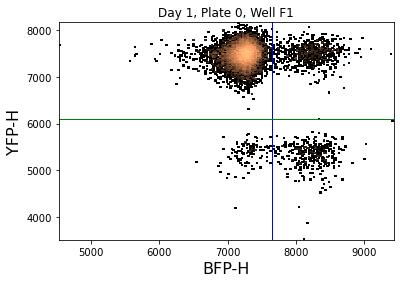

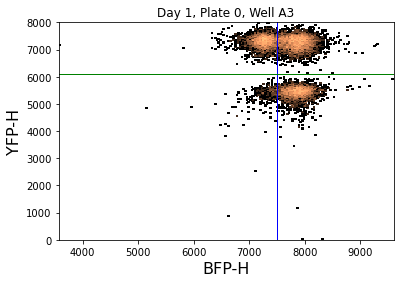

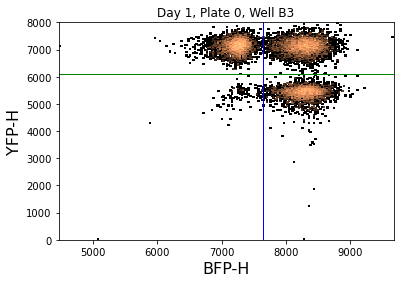

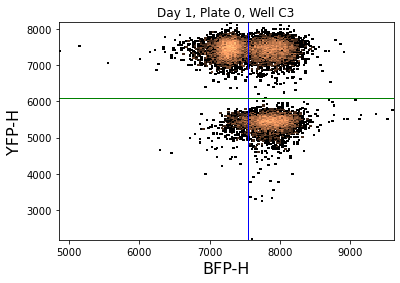

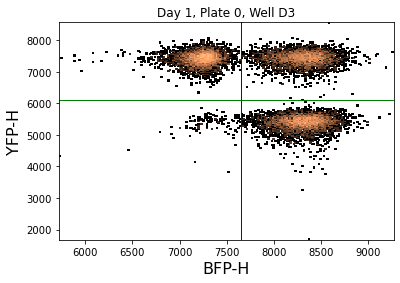

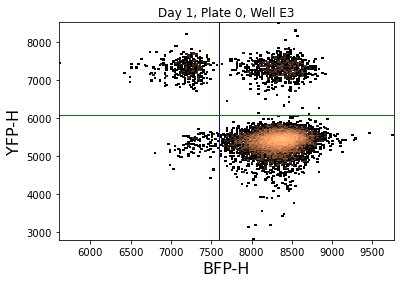

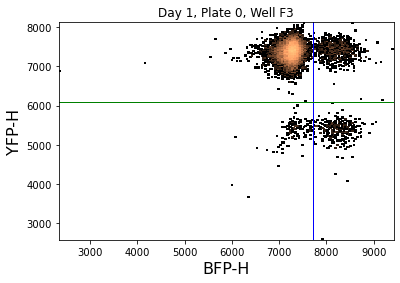

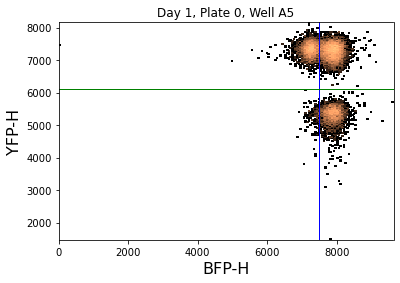

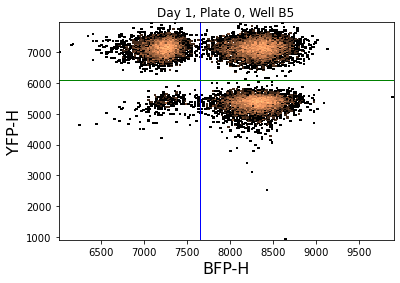

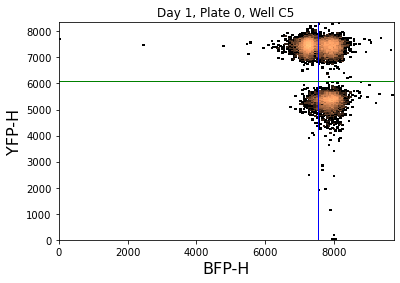

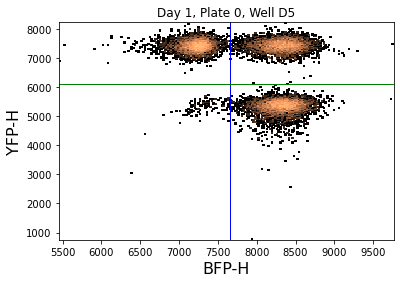

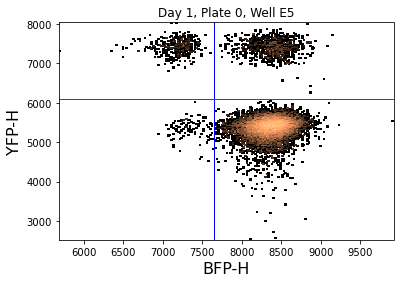

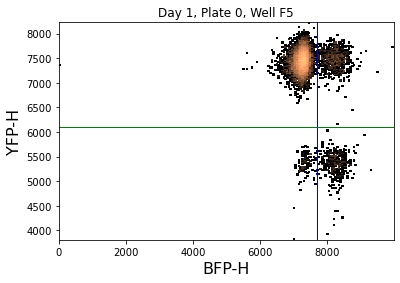

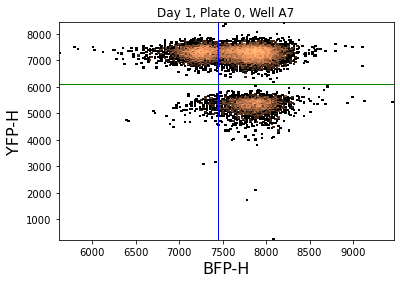

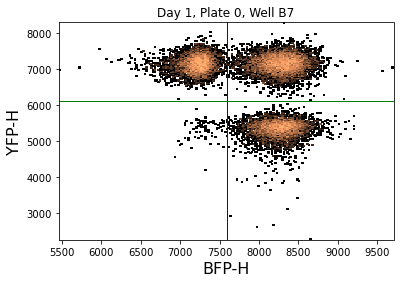

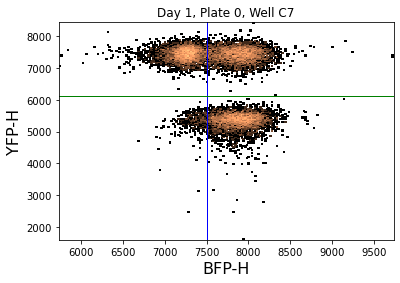

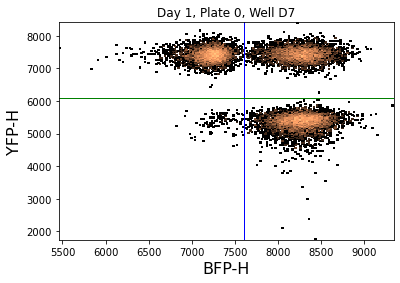

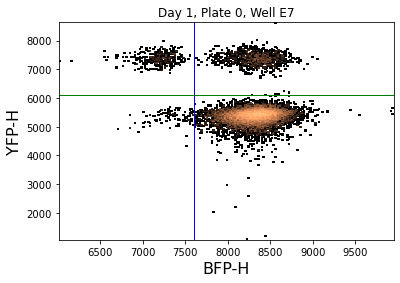

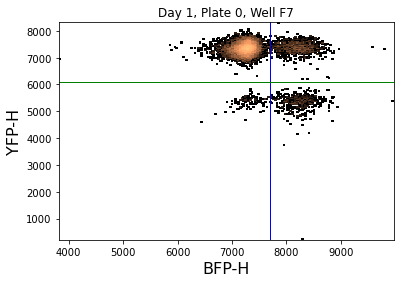

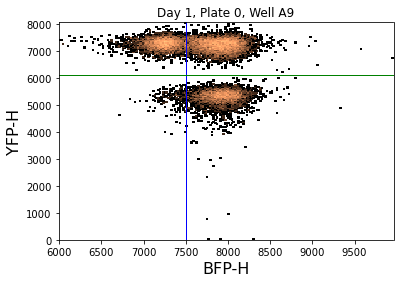

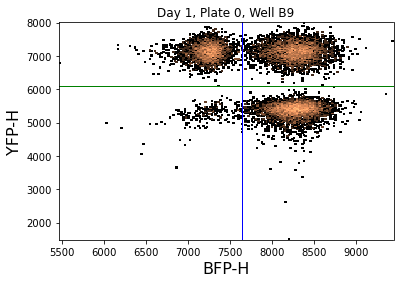

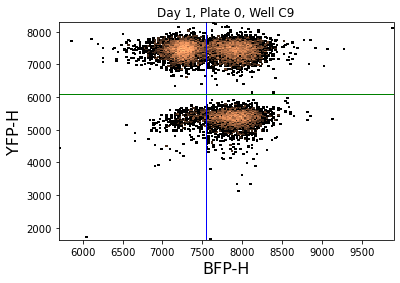

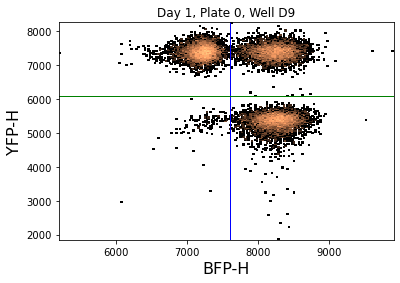

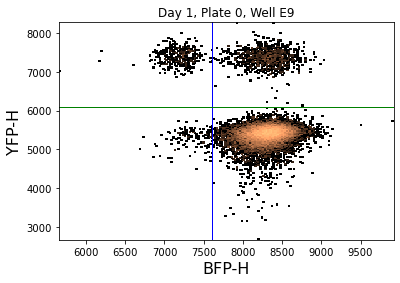

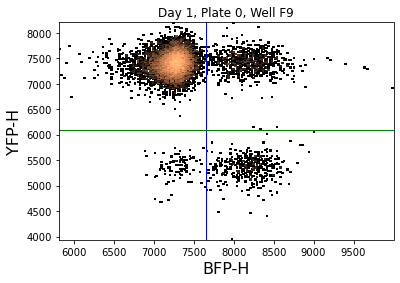

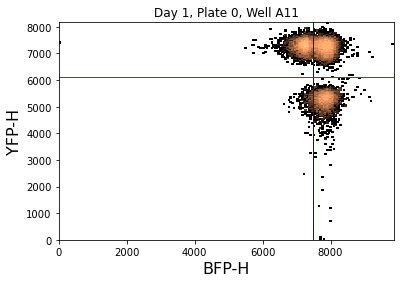

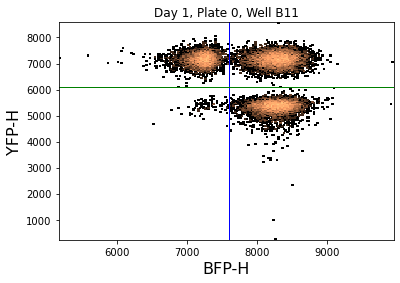

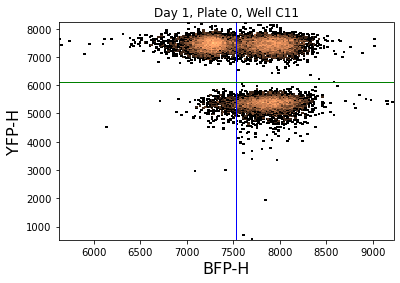

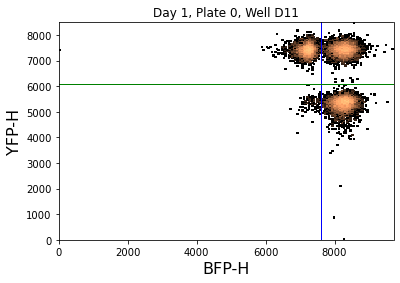

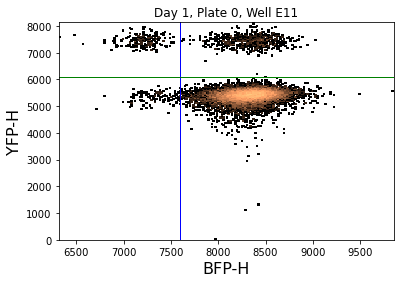

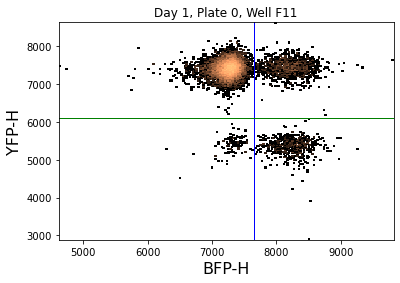

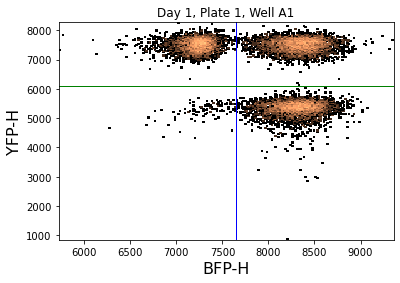

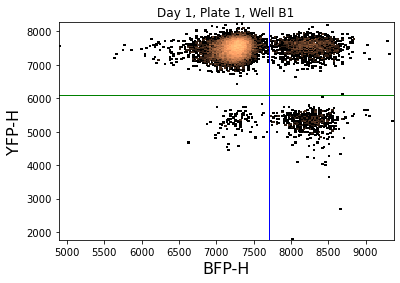

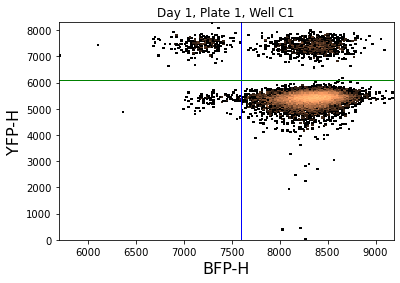

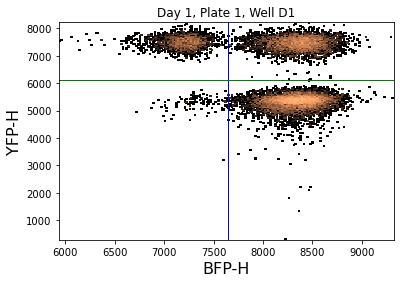

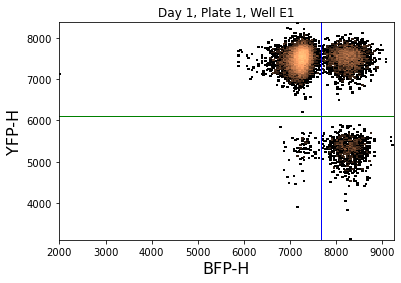

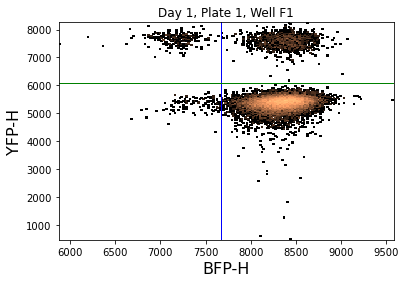

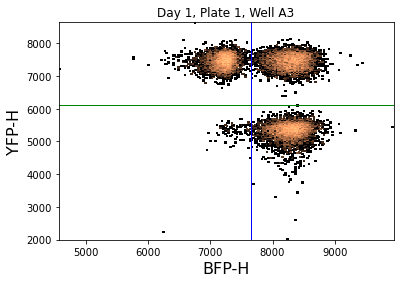

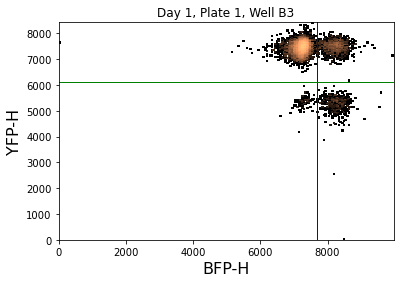

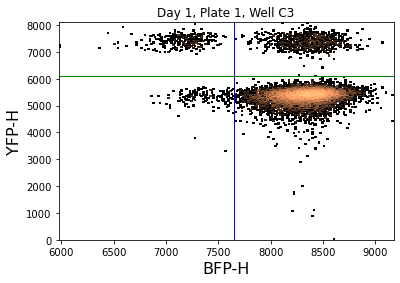

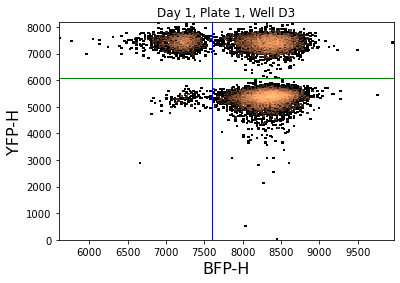

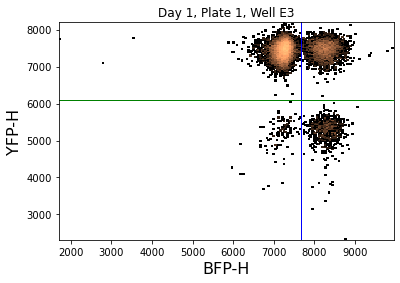

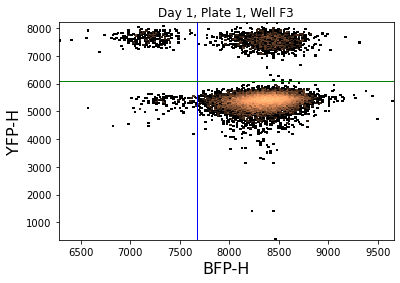

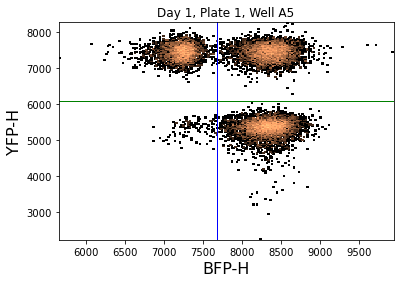

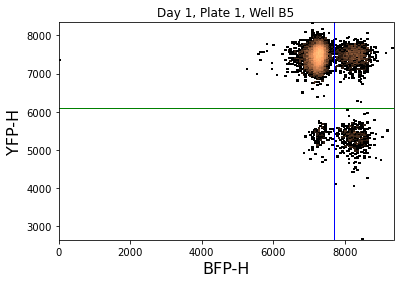

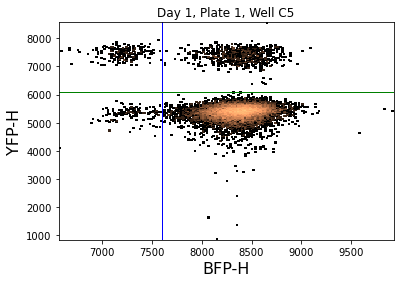

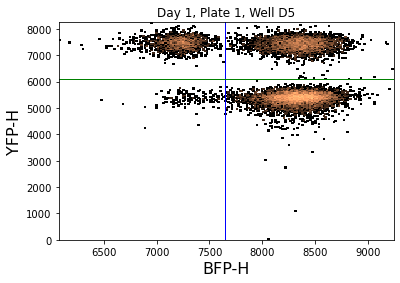

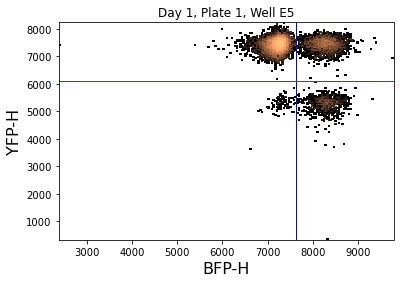

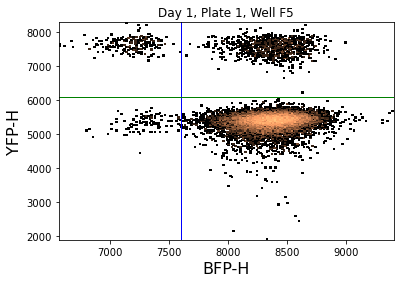

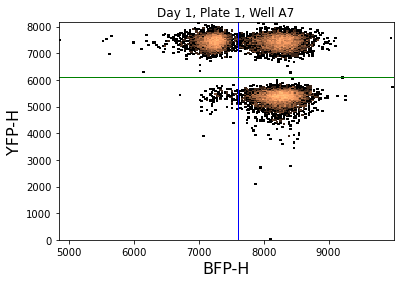

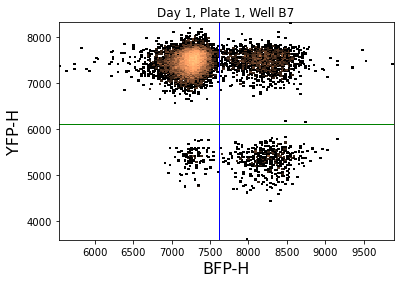

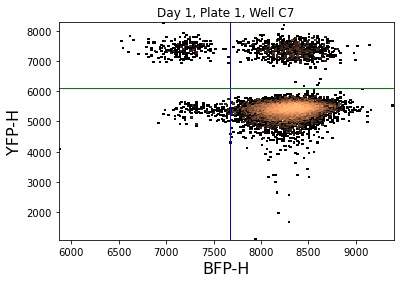

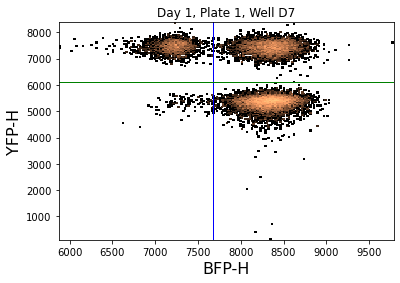

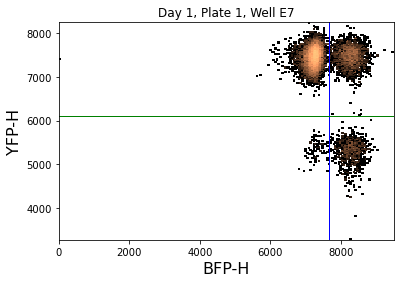

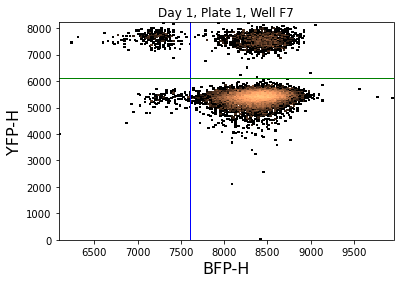

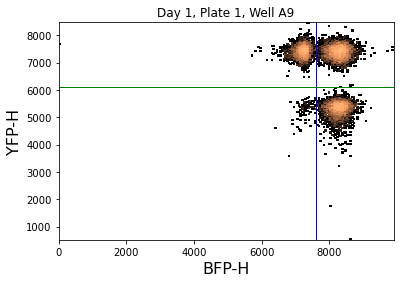

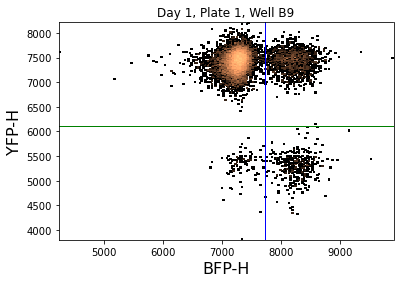

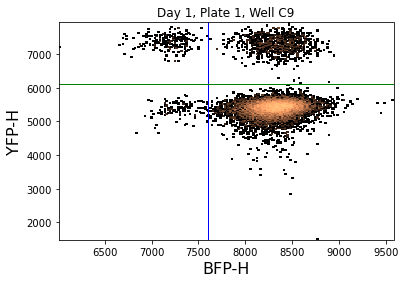

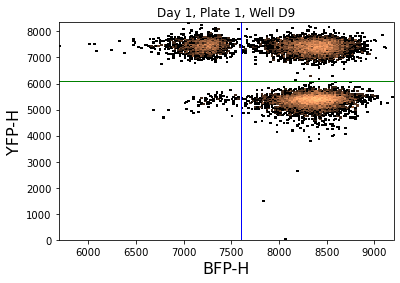

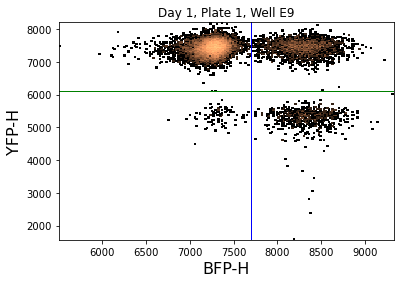

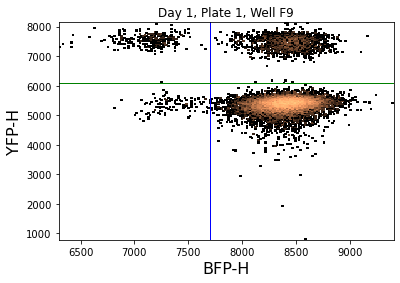

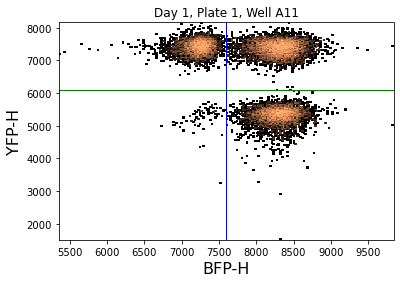

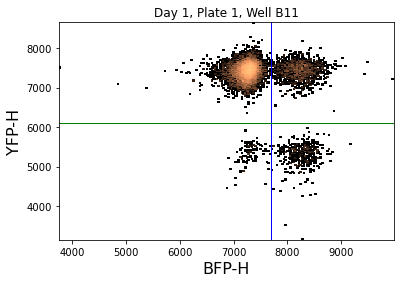

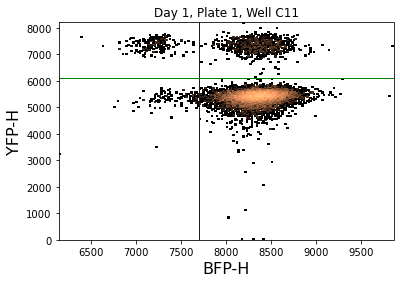

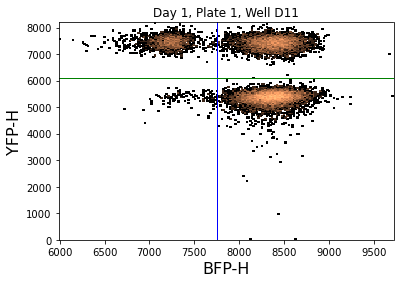

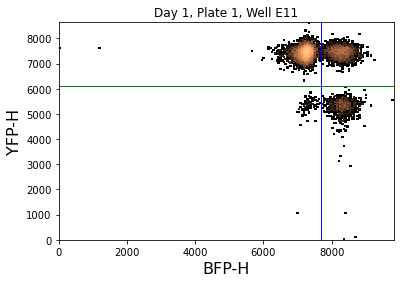

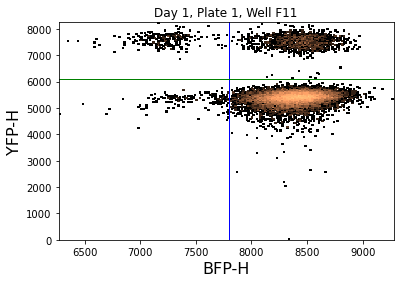

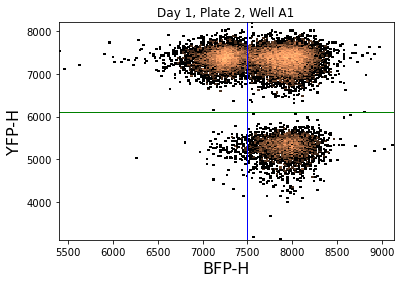

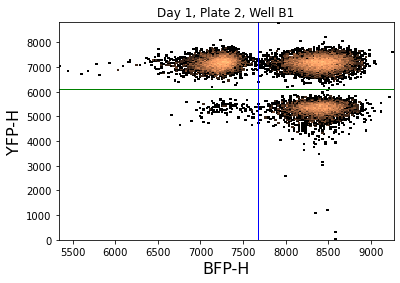

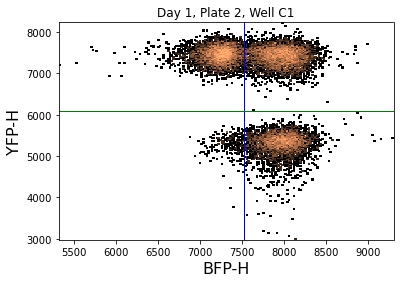

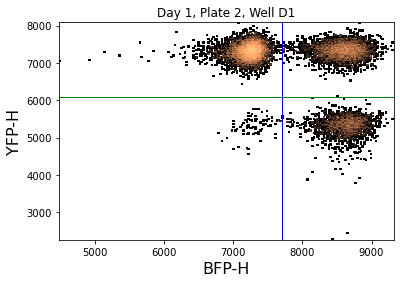

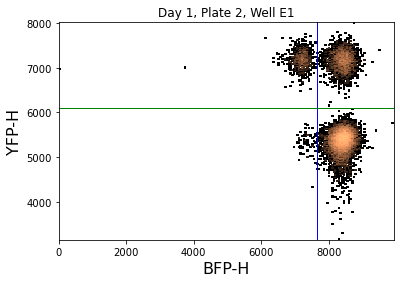

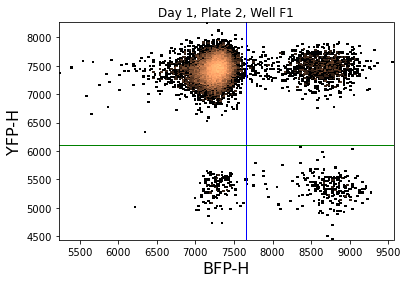

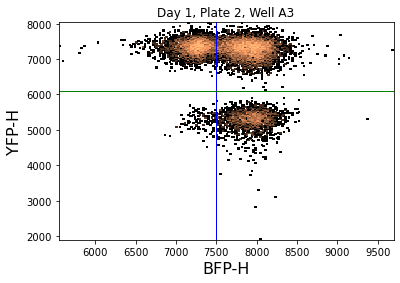

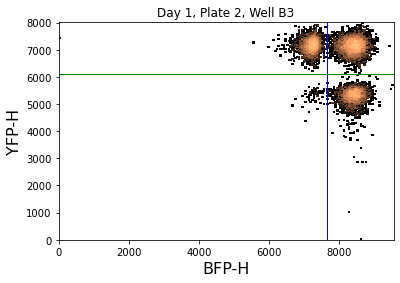

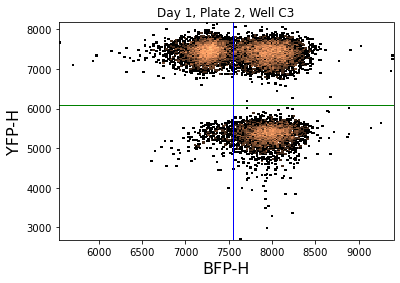

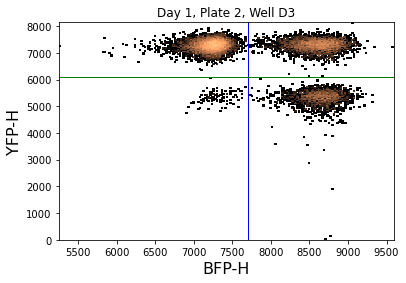

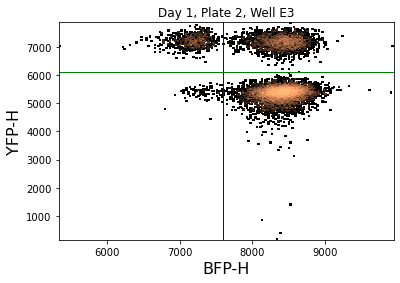

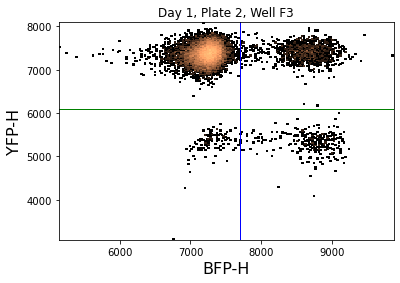

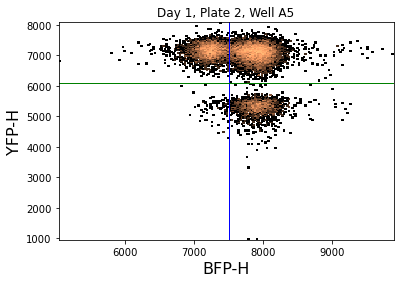

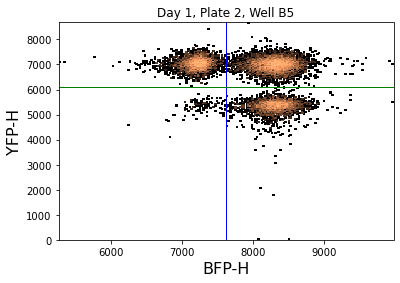

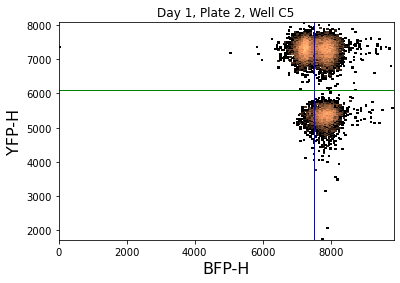

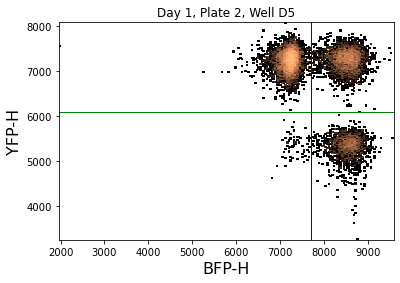

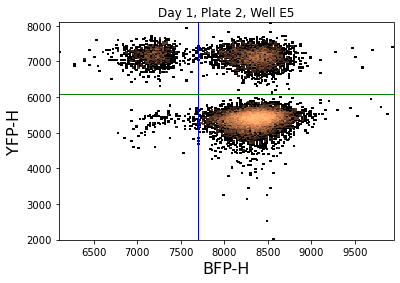

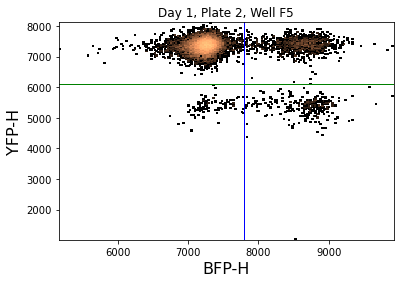

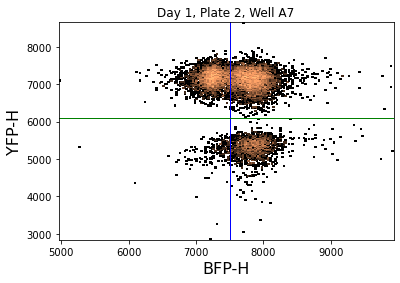

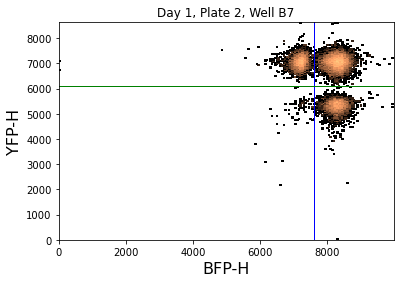

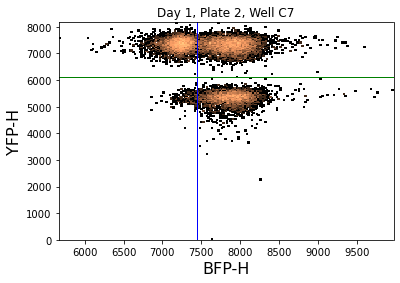

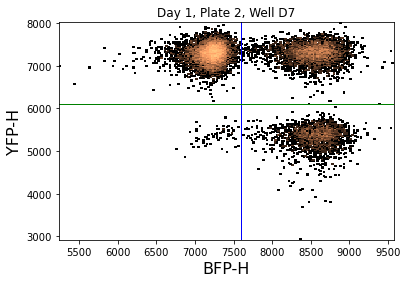

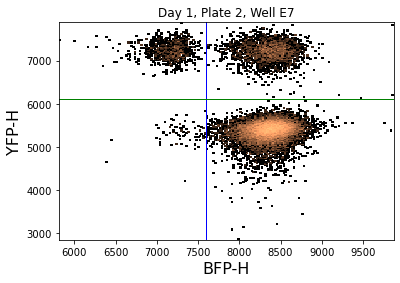

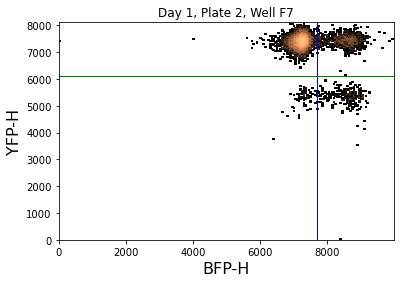

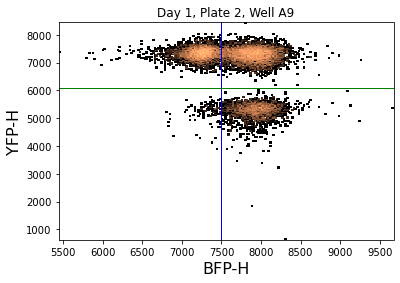

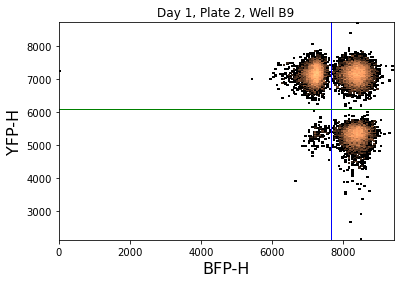

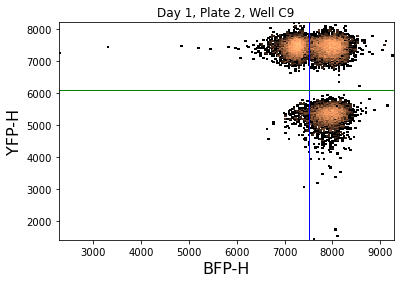

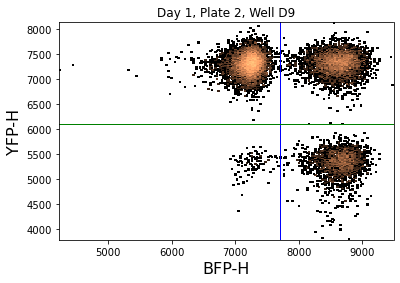

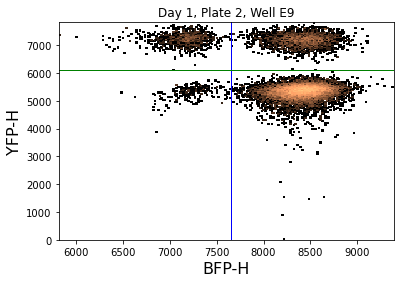

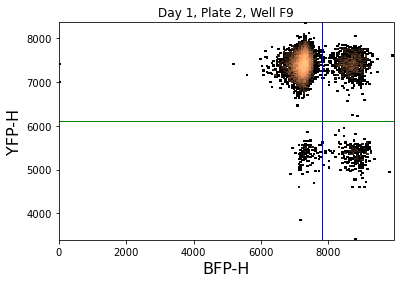

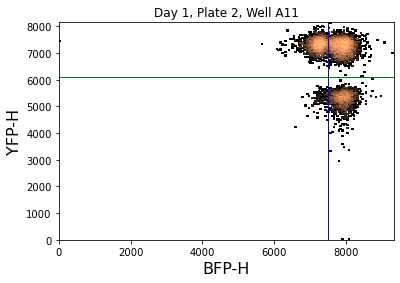

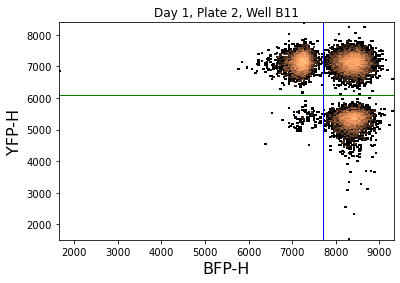

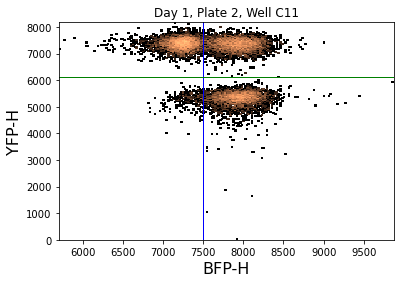

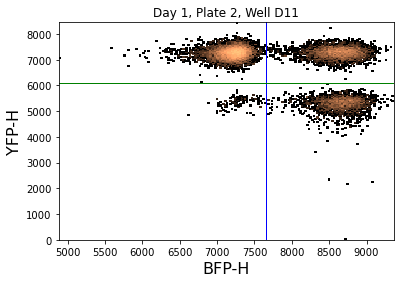

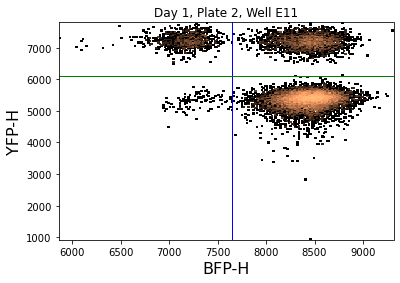

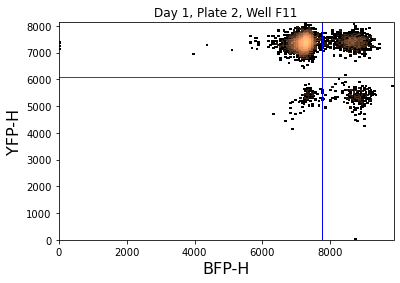

In [8]:
wells = [[['A1','B1','C1','D1','E1','F1','A3','B3','C3','A5','B5','C5','D5','E5','F5','A7','B7','C7','A9','B9','C9','D9','E9','F9','A11','B11','C11'], ['A1','B1','C1','D1','E1','F1','A3','B3','C3']], 
         [['A1','B1','C1','D1','E1','F1','A3','B3','C3','D3','E3','F3','A5','B5','C5','D5','E5','F5','A7','B7','C7','D7','E7','F7','A9','B9','C9','D9','E9','F9','A11','B11','C11','D11','E11','F11'], 
         ['A1','B1','C1','D1','E1','F1','A3','B3','C3','D3','E3','F3','A5','B5','C5','D5','E5','F5','A7','B7','C7','D7','E7','F7','A9','B9','C9','D9','E9','F9','A11','B11','C11','D11','E11','F11'], 
         ['A1','B1','C1','D1','E1','F1','A3','B3','C3','D3','E3','F3','A5','B5','C5','D5','E5','F5','A7','B7','C7','D7','E7','F7','A9','B9','C9','D9','E9','F9','A11','B11','C11','D11','E11','F11']]]

for day in days:
    for plate in plates[day]:
        for well in wells[day][plates[day].index(plate)]:
            plt.figure()
            plot_plates(plates, day, plates[day].index(plate), well, bfp_threshold, yfp_threshold)
            plt.title('Day %d, Plate %d, Well %s' % (day, plates[day].index(plate), well))
            plt.show()

In [9]:
print(plates)

{0: [<FCOrderedCollection '96-well'>, <FCOrderedCollection '96-well'>], 1: [<FCOrderedCollection '96-well'>, <FCOrderedCollection '96-well'>, <FCOrderedCollection '96-well'>]}


In [10]:
b_data=[]

cols = [1,3,5,7,9,11]
rows = ['A','B','C','D','E','F']

for day in days:
    for row in rows:
        for col in cols:
            for plate in plates[day]:
                well = row + str(col)
                well_sort = str(col) + row
                try:
                    res,Q,bfp,yfp = get_bfp_freq(plate[well].data, day, plates[day].index(plate), well)
                except:
                    continue
                if day == 0 and plates[day].index(plate)+1 == 1: 
                    if col == 1 or col == 5 or col == 9:
                        if row == 'A':
                            group = "A-FDaily_A"
                        if row == 'B':
                            group = "A-FDaily_B"
                        if row == 'C':
                            group = "A-FDaily_C"
                        if row == 'D':
                            group = "A-FDaily_D"
                        if row == 'E':
                            group = "A-FDaily_E"
                        if row == 'F':
                            group = "A-FDaily_F"    
                    if col == 3 or col == 7 or col == 11:  
                        if row == 'A':
                            group = "G-IDaily_G"
                        if row == 'B':
                            group = "G-IDaily_H"
                        if row == 'C':
                            group = "G-IDaily_I"
                if day == 0 and plates[day].index(plate)+1 == 2:
                    if col == 1:
                        group = "A-FPreM"
                    if col == 3:  
                        group = "G-IPreM"
                if day == 1 and plates[day].index(plate)+1 == 1:
                    if row == 'A':
                        group = "DlyA-F_A"
                    if row == 'B':
                        group = "DlyA-F_B"
                    if row == 'C':
                        group = "DlyA-F_C"
                    if row == 'D':
                        group = "DlyA-F_D"
                    if row == 'E':
                        group = "DlyA-F_E"
                    if row == 'F':
                        group = "DlyA-F_F"
                if day == 1 and plates[day].index(plate)+1 == 2:
                    if row == 'A':
                        group = "DlyG-I_G"
                    if row == 'B':
                        group = "DlyG-I_H"
                    if row == 'C':
                        group = "DlyG-I_I"
                    if row == 'D':
                        group = "PreG-I_G"
                    if row == 'E':
                        group = "PreG-I_H"
                    if row == 'F':
                        group = "PreG-I_I"
                if day == 1 and plates[day].index(plate)+1 == 3:
                    if row == 'A':
                        group = "PreA-F_A"
                    if row == 'B':
                        group = "PreA-F_B"
                    if row == 'C':
                        group = "PreA-F_C"
                    if row == 'D':
                        group = "PreA-F_D"
                    if row == 'E':
                        group = "PreA-F_E"
                    if row == 'F':
                        group = "PreA-F_F"
                b_data.append({
                    'day':day,
                    'plate':plates[day].index(plate)+1,
                    'well':well,
                    'sort by well': well_sort,
                    'group': group,
                    'S freq': res[0],
                    'lambda': res[1],
                    'total count':Q,
                    'corrected total count': Q*res[1]/(1-np.exp(-res[1])),
                    'BFP':bfp,
                    'YFP':yfp,
                })     
            
df = pd.DataFrame(b_data)
df['f_trafo'] = np.arcsin(2*df['S freq'] - 1) #perform variance stabilizing transform
df.sort_values(['day','plate','sort by well'])

,day,plate,well,sort by well,group,S freq,lambda,total count,corrected total count,BFP,YFP,f_trafo
7,0,1,A11,11A,G-IDaily_G,0.519927,1.665459,13230,27172.435838,8243.384766,7308.499512,0.039864
15,0,1,B11,11B,G-IDaily_H,0.039620,2.344874,22573,58542.703315,8248.386719,7412.997070,-1.170022
23,0,1,C11,11C,G-IDaily_I,0.945199,1.659275,13769,28215.267625,8282.932617,7265.503418,1.098220
0,0,1,A1,1A,A-FDaily_A,0.472313,2.050012,10583,24900.843830,7912.619629,7261.732910,-0.055403
8,0,1,B1,1B,A-FDaily_B,0.543506,1.792291,10857,23348.200047,8286.259766,7128.305176,0.087121
...,...,...,...,...,...,...,...,...,...,...,...,...
68,1,3,B9,9B,PreA-F_B,0.468753,1.579895,17924,35664.891309,8382.679688,7155.907715,-0.062534
86,1,3,C9,9C,PreA-F_C,0.482813,1.756660,15399,32694.557447,7961.895508,7433.622070,-0.034381
104,1,3,D9,9D,PreA-F_D,0.295817,1.478954,16521,31644.916371,8648.635742,7301.992676,-0.420662
122,1,3,E9,9E,PreA-F_E,0.868816,1.423153,17895,33551.712198,8412.678711,7216.515625,0.829557


In [11]:
df_d0 = df.loc[(df['day']==0) & (df['plate']==1)]
df_d0.sort_values(['plate','sort by well'])


,day,plate,well,sort by well,group,S freq,lambda,total count,corrected total count,BFP,YFP,f_trafo
7,0,1,A11,11A,G-IDaily_G,0.519927,1.665459,13230,27172.435838,8243.384766,7308.499512,0.039864
15,0,1,B11,11B,G-IDaily_H,0.039620,2.344874,22573,58542.703315,8248.386719,7412.997070,-1.170022
23,0,1,C11,11C,G-IDaily_I,0.945199,1.659275,13769,28215.267625,8282.932617,7265.503418,1.098220
0,0,1,A1,1A,A-FDaily_A,0.472313,2.050012,10583,24900.843830,7912.619629,7261.732910,-0.055403
8,0,1,B1,1B,A-FDaily_B,0.543506,1.792291,10857,23348.200047,8286.259766,7128.305176,0.087121
16,0,1,C1,1C,A-FDaily_C,0.482953,1.574727,11034,21912.916838,7918.569824,7383.416992,-0.034100
24,0,1,D1,1D,A-FDaily_D,0.510031,1.256136,12073,21202.904330,8282.404297,7480.270020,0.020064
28,0,1,E1,1E,A-FDaily_E,0.951764,1.345853,12921,23509.772710,8324.501953,7458.775391,1.127930
32,0,1,F1,1F,A-FDaily_F,0.068091,1.302380,11523,20611.168726,8241.533203,7501.820801,-1.042801
2,0,1,A3,3A,G-IDaily_G,0.539079,1.730536,10773,22657.783526,8264.656250,7393.896973,0.078237


In [12]:
df_vard0 = df_d0.groupby(['group']).var().reset_index() #calculate variance
df_vard0.head(50)

,group,day,plate,S freq,lambda,total count,corrected total count,BFP,YFP,f_trafo
0,A-FDaily_A,0.0,0.0,0.000239,0.011778,2.534093e+05,1.763724e+06,498.966163,2779.206873,0.000956
1,A-FDaily_B,0.0,0.0,0.000244,0.004680,2.298794e+06,1.420584e+07,444.738194,1455.628825,0.000990
2,A-FDaily_C,0.0,0.0,0.000517,0.002294,3.787000e+05,6.433857e+05,741.529185,1739.644083,0.002071
3,A-FDaily_D,0.0,0.0,0.000136,0.000758,5.923823e+05,2.511784e+06,185.540854,2332.721414,0.000543
4,A-FDaily_E,0.0,0.0,0.000002,0.007324,6.586013e+05,2.711948e+06,354.247376,2468.408614,0.000043
5,A-FDaily_F,0.0,0.0,0.000121,0.015790,1.708950e+06,1.294837e+07,112.479136,2845.634882,0.002243
6,G-IDaily_G,0.0,0.0,0.000246,0.001129,1.567314e+06,5.288387e+06,173.036920,1892.286584,0.000991
7,G-IDaily_H,0.0,0.0,0.000416,0.170779,3.440255e+07,3.706093e+08,160.166466,47.581925,0.007882
8,G-IDaily_I,0.0,0.0,0.000070,0.000554,8.080493e+05,4.124955e+06,437.190628,4363.122194,0.001573


In [13]:
df_d1 = df[df['day']==1]
df_d1.sort_values(['plate','sort by well'])
df_vard1 = df_d1.groupby(['group']).var().reset_index() #calculate variance
df_vard1.head(50)

,group,day,plate,S freq,lambda,total count,corrected total count,BFP,YFP,f_trafo
0,DlyA-F_A,0.0,0.0,0.000198,0.052258,3.552360e+06,2.944238e+07,611.726180,335.847245,0.000793
1,DlyA-F_B,0.0,0.0,0.000973,0.009306,7.788402e+06,4.283655e+07,2738.605748,11391.443570,0.003911
2,DlyA-F_C,0.0,0.0,0.000580,0.003381,2.487967e+06,9.398386e+06,113.221268,98.717378,0.002325
3,DlyA-F_D,0.0,0.0,0.000385,0.001283,2.841180e+06,1.034766e+07,612.196823,924.543249,0.001545
4,DlyA-F_E,0.0,0.0,0.000057,0.006238,5.918039e+05,3.461873e+06,430.444012,2147.610243,0.001464
5,DlyA-F_F,0.0,0.0,0.000225,0.004533,4.046267e+04,4.993226e+05,538.035214,2069.304334,0.003848
6,DlyG-I_G,0.0,0.0,0.000359,0.031767,6.805768e+05,6.957278e+06,631.848553,990.084831,0.001456
7,DlyG-I_H,0.0,0.0,0.000010,0.016889,1.700676e+06,5.682769e+06,101.379788,982.327273,0.000147
8,DlyG-I_I,0.0,0.0,0.000012,0.014768,1.305810e+06,1.845124e+06,350.686012,2025.037060,0.000318
9,PreA-F_A,0.0,0.0,0.000077,0.014663,3.321877e+06,2.134892e+07,683.507158,9238.718370,0.000318


In [14]:
title_dict = {"DlyA-F_A":"REL 606 BFP:REL 606 YFP 50:50, daily mix", 
              "DlyA-F_B":"S BFP:S YFP 50:50, daily mix",
              "DlyA-F_C":"Sl1 BFP:Sl1YFP 50:50, daily mix", 
              "DlyA-F_D":"S BFP:L YFP 50:50, daily mix",
              "DlyA-F_E":"S BFP:L YFP 95:5, daily mix",
              "DlyA-F_F":"S BFP:L YFP 5:95, daily mix", 
              "DlyG-I_G":"S BFP:Sl1 YFP 50:50, daily mix",
              "DlyG-I_H":"S BFP:Sl1 YFP 5:95, daily mix",
              "DlyG-I_I":"S BFP:Sl1 YFP 95:5, daily mix",
              "PreA-F_A":"REL 606 BFP:REL 606 YFP 50:50, premixed", 
              "PreA-F_B":"S BFP:S YFP 50:50, premixed",
              "PreA-F_C":"Sl1 BFP:Sl1YFP 50:50, premixed", 
              "PreA-F_D":"S BFP:L YFP 50:50, premixed",
              "PreA-F_E":"S BFP:L YFP 95:5, premixed",
              "PreA-F_F":"S BFP:L YFP 5:95, premixed", 
              "PreG-I_G":"S BFP:Sl1 YFP 50:50, premixed",
              "PreG-I_H":"S BFP:Sl1 YFP 5:95, premixed",
              "PreG-I_I":"S BFP:Sl1 YFP 95:5, premixed"}
df_vard1['group'] = df_vard1['group'].replace(title_dict)
df_vard1.head(50)

,group,day,plate,S freq,lambda,total count,corrected total count,BFP,YFP,f_trafo
0,"REL 606 BFP:REL 606 YFP 50:50, daily mix",0.0,0.0,0.000198,0.052258,3.552360e+06,2.944238e+07,611.726180,335.847245,0.000793
1,"S BFP:S YFP 50:50, daily mix",0.0,0.0,0.000973,0.009306,7.788402e+06,4.283655e+07,2738.605748,11391.443570,0.003911
2,"Sl1 BFP:Sl1YFP 50:50, daily mix",0.0,0.0,0.000580,0.003381,2.487967e+06,9.398386e+06,113.221268,98.717378,0.002325
3,"S BFP:L YFP 50:50, daily mix",0.0,0.0,0.000385,0.001283,2.841180e+06,1.034766e+07,612.196823,924.543249,0.001545
4,"S BFP:L YFP 95:5, daily mix",0.0,0.0,0.000057,0.006238,5.918039e+05,3.461873e+06,430.444012,2147.610243,0.001464
5,"S BFP:L YFP 5:95, daily mix",0.0,0.0,0.000225,0.004533,4.046267e+04,4.993226e+05,538.035214,2069.304334,0.003848
6,"S BFP:Sl1 YFP 50:50, daily mix",0.0,0.0,0.000359,0.031767,6.805768e+05,6.957278e+06,631.848553,990.084831,0.001456
7,"S BFP:Sl1 YFP 5:95, daily mix",0.0,0.0,0.000010,0.016889,1.700676e+06,5.682769e+06,101.379788,982.327273,0.000147
8,"S BFP:Sl1 YFP 95:5, daily mix",0.0,0.0,0.000012,0.014768,1.305810e+06,1.845124e+06,350.686012,2025.037060,0.000318
9,"REL 606 BFP:REL 606 YFP 50:50, premixed",0.0,0.0,0.000077,0.014663,3.321877e+06,2.134892e+07,683.507158,9238.718370,0.000318


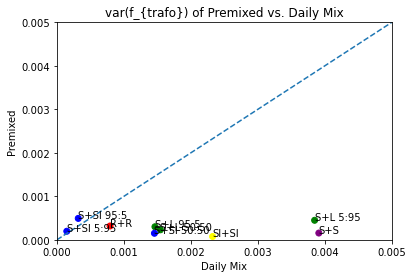

In [72]:
labels = ["R+R", "S+S", "Sl+Sl", "S+L 50:50", "S+L 95:5", "S+L 5:95", "S+Sl 50:50", "S+Sl 5:95", "S+Sl 95:5"]  
colors = ["red", "purple", "yellow", "green", "green", "green", "blue", "blue", "blue"]

premix_var = df_vard1['f_trafo'][9:]
daily_var = df_vard1['f_trafo'][:9]
plt.scatter(daily_var, premix_var,c=colors)

plt.title("var(f_{trafo}) of Premixed vs. Daily Mix")
plt.xlabel("Daily Mix")
plt.ylabel("Premixed")
plt.xlim(0, 0.005)
plt.ylim(0, 0.005) #0.005
for daily, pre, label in zip(daily_var, premix_var, labels):
    plt.text(daily, pre, label)
plt.plot([0,0.005],[0,0.005],'--')
plt.show()

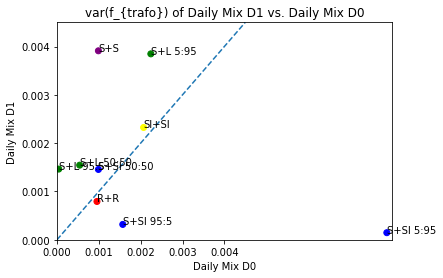

In [71]:
labels = ["R+R", "S+S", "Sl+Sl", "S+L 50:50", "S+L 95:5", "S+L 5:95", "S+Sl 50:50", "S+Sl 5:95", "S+Sl 95:5"] 
colors = ["red", "purple", "yellow", "green", "green", "green", "blue", "blue", "blue"]

var = df_vard0['f_trafo']
daily_var = df_vard1['f_trafo'][:9]
plt.scatter(var, daily_var, c=colors)

plt.title("var(f_{trafo}) of Daily Mix D1 vs. Daily Mix D0")
plt.xlabel("Daily Mix D0")
plt.ylabel("Daily Mix D1")
plt.xlim(0, 0.008) #0.008
plt.ylim(0, 0.0045) #0.0 45
plt.xticks(ticks=[0, 0.001, 0.002, 0.003, 0.004]) #0.005, 0.006, 0.007, 0.008])
plt.yticks(ticks=[0, 0.001, 0.002, 0.003, 0.004]) #0.005, 0.006, 0.007, 0.008])
for daily, pre, label in zip(var, daily_var, labels):
    plt.text(daily, pre, label)
plt.plot([0,0.0045],[0,0.0045],'--')
plt.show()

#S+Sl 5:95 outlier?
#range of variance for D0 (pipetting same replicate) ranges from 0.0-0.0022

In [21]:
def CI(alpha, df_var):
    n = 6
    a = sp.stats.chi2.isf(1-alpha/2, n-1)
    b = sp.stats.chi2.isf(alpha/2, n-1)
    df_var['u'] = ((n-1)*df_var['f_trafo'])/a - df_var['f_trafo']
    df_var['l'] = df_var['f_trafo'] - ((n-1)*df_var['f_trafo'])/b

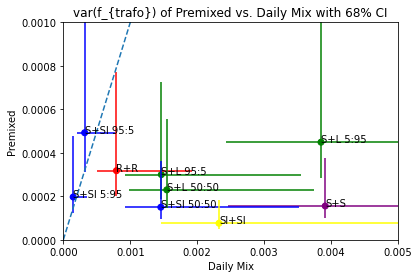

In [70]:
CI(0.32, df_vard1)
labels = ["R+R", "S+S", "Sl+Sl", "S+L 50:50", "S+L 95:5", "S+L 5:95", "S+Sl 50:50", "S+Sl 5:95", "S+Sl 95:5"]  
colors = ["red", "purple", "yellow", "green", "green", "green", "blue", "blue", "blue"]


premix_var = df_vard1['f_trafo'][9:]
daily_var = df_vard1['f_trafo'][:9]
plt.scatter(daily_var, premix_var, c=colors)
plt.errorbar(daily_var, premix_var, 
             xerr = (df_vard1['l'][:9].to_list(),df_vard1['u'][:9].to_list()), #fmt='o')  
             yerr = (df_vard1['l'][9:].to_list(),df_vard1['u'][9:].to_list()), fmt='none', ecolor=colors)

plt.title("var(f_{trafo}) of Premixed vs. Daily Mix with 68% CI")
plt.xlabel("Daily Mix")
plt.ylabel("Premixed")
plt.xlim(0, 0.005) #0.01
plt.ylim(0, 0.001) #0.005
for daily, pre, label in zip(daily_var, premix_var, labels):
    plt.text(daily, pre, label)

plt.plot([0,0.005],[0,0.005],'--')
plt.show()

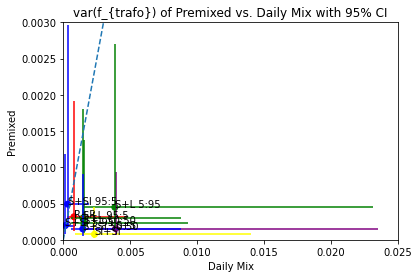

,group,day,plate,S freq,lambda,total count,corrected total count,BFP,YFP,f_trafo,u,l
0,"REL 606 BFP:REL 606 YFP 50:50, daily mix",0.0,0.0,0.000198,0.052258,3.552360e+06,2.944238e+07,611.726180,335.847245,0.000793,0.003978,0.000484
1,"S BFP:S YFP 50:50, daily mix",0.0,0.0,0.000973,0.009306,7.788402e+06,4.283655e+07,2738.605748,11391.443570,0.003911,0.019616,0.002387
2,"Sl1 BFP:Sl1YFP 50:50, daily mix",0.0,0.0,0.000580,0.003381,2.487967e+06,9.398386e+06,113.221268,98.717378,0.002325,0.011660,0.001419
3,"S BFP:L YFP 50:50, daily mix",0.0,0.0,0.000385,0.001283,2.841180e+06,1.034766e+07,612.196823,924.543249,0.001545,0.007749,0.000943
4,"S BFP:L YFP 95:5, daily mix",0.0,0.0,0.000057,0.006238,5.918039e+05,3.461873e+06,430.444012,2147.610243,0.001464,0.007341,0.000893
5,"S BFP:L YFP 5:95, daily mix",0.0,0.0,0.000225,0.004533,4.046267e+04,4.993226e+05,538.035214,2069.304334,0.003848,0.019300,0.002349
6,"S BFP:Sl1 YFP 50:50, daily mix",0.0,0.0,0.000359,0.031767,6.805768e+05,6.957278e+06,631.848553,990.084831,0.001456,0.007302,0.000889
7,"S BFP:Sl1 YFP 5:95, daily mix",0.0,0.0,0.000010,0.016889,1.700676e+06,5.682769e+06,101.379788,982.327273,0.000147,0.000738,0.000090
8,"S BFP:Sl1 YFP 95:5, daily mix",0.0,0.0,0.000012,0.014768,1.305810e+06,1.845124e+06,350.686012,2025.037060,0.000318,0.001596,0.000194
9,"REL 606 BFP:REL 606 YFP 50:50, premixed",0.0,0.0,0.000077,0.014663,3.321877e+06,2.134892e+07,683.507158,9238.718370,0.000318,0.001594,0.000194


In [76]:
CI(0.05, df_vard1)
labels = ["R+R", "S+S", "Sl+Sl", "S+L 50:50", "S+L 95:5", "S+L 5:95", "S+Sl 50:50", "S+Sl 5:95", "S+Sl 95:5"]  
colors = ["red", "purple", "yellow", "green", "green", "green", "blue", "blue", "blue"]

premix_var = df_vard1['f_trafo'][9:]
daily_var = df_vard1['f_trafo'][:9]
plt.scatter(daily_var, premix_var, c=colors)
plt.errorbar(daily_var, premix_var, 
             xerr = (df_vard1['l'][:9].to_list(),df_vard1['u'][:9].to_list()), #fmt='o')  
             yerr = (df_vard1['l'][9:].to_list(),df_vard1['u'][9:].to_list()), fmt='none', ecolor=colors)

plt.title("var(f_{trafo}) of Premixed vs. Daily Mix with 95% CI")
plt.xlabel("Daily Mix")
plt.ylabel("Premixed")
plt.xlim(0, 0.025) #0.01
plt.ylim(0, 0.003) #0.005
for daily, pre, label in zip(daily_var, premix_var, labels):
    plt.text(daily, pre, label)
plt.plot([0,0.005],[0,0.005],'--')
plt.show()

df_vard1.head(50)